In [1]:
from event_generator import Events

In [32]:
a = Events(0.5, [[0, 300], [400, 700]])

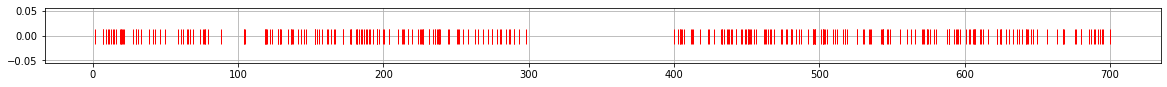

In [33]:
import matplotlib.pyplot as plt

plt.figure(figsize=(20,1))
plt.plot(a.events, np.zeros_like(a.events), 'or', marker='|', markersize=15)
plt.grid()
plt.show()

In [28]:
m = []
for i in range(10000):
    a = Events(0.25, [[0, 300], [400, 700]])
    s = 0
    for interval in a.intervals:
        s+=interval[1] - interval[0]
    m.append(len(a.events)/s)
print(sum(m)/len(m))

0.24988399999999952
